In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [ ]:
def import_data(q, state, SPINS):
    q = 0.1
    fname = "DATA/dataRBM_q" + str(q) + "_" + str(state)+ "state.csv"
    # Visible data
    v = np.loadtxt(fname,delimiter=",",dtype=int)
    N = len(v)
    # Length of sample
    L = len(v[0])
    print(f"Each of N={N} data samples has L={L} digits.")

    q = 0
    fname = "DATA/dataRBM_q" + str(q) + "_" + str(state) + "state.csv"
    # Visible data not corrupted
    v_true = np.loadtxt(fname,delimiter=",",dtype=int)

    # Choice of using -1/+1 and not 0,1
    if SPINS:
        vmin = -1
    # The energy gap now is 2 not 1
        GAP  = 2  
        v = 2*v -1
        v_true = 2*v -1
    else:
        vmin = 0
        GAP = 1

    # Store initial values
    v0 = np.zeros_like(v)
    v0[:] = v[:]


    for n in range(10):
        print(v[n])

    print("...")

    return v, v_true

In [ ]:
q = 0.1
fname = "DATA/dataRBM_q"+str(q)+".csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

q = 0
fname = "DATA/dataRBM_q"+str(q)+".csv"
# Visible data not corrupted
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

print("...")

# Choice of using -1/+1 and not 0,1
SPINS = False
if SPINS:
    vmin = -1
# The energy gap now is 2 not 1
    GAP  = 2  
    v = 2*v -1
else:
    vmin = 0
    GAP = 1

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]


for n in range(10):
    print(v[n])

print("...")

Each of N=10000 data samples has L=8 digits.
...
[0 1 0 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[0 1 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 0 0 1 0 0 0]
[0 1 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...


In [ ]:
v, v_true = import_data(0.1, 3, False)

Each of N=10000 data samples has L=8 digits.
[0 1 0 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[0 1 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 0 0 1 0 0 0]
[0 1 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...


In [ ]:
# Number of hidden units
M = 3

# This is good, is written in the review the denom is prop to the lenght of M
sigma = np.sqrt(4. /float(L + M))
np.random.seed(12345)

# Numbers in [-sigma;sigma]
w = sigma * (2*np.random.rand(L,M) - 1)
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print(f"w = {w}\na = {a}\nb = {b}")
w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
w0[:],a0[:],b0[:] = w[:],a[:],b[:]

w = [[ 0.5181365  -0.22145941 -0.38120826]
 [-0.35631371  0.08167946  0.11523125]
 [ 0.56022559  0.18473853  0.3001927 ]
 [ 0.18521223  0.2987553   0.55635686]
 [-0.59290602 -0.47464594 -0.24277246]
 [ 0.18863898  0.373648    0.44886104]
 [ 0.56038609  0.26977468  0.17183171]
 [ 0.26225893 -0.03907707 -0.21035279]]
a = [-0.07279134  0.27701546  0.59580401  0.21331772  0.35074515 -0.39689234
 -0.57064124  0.36226014]
b = [0. 0. 0.]


### Way to plots the Boltzmann machine

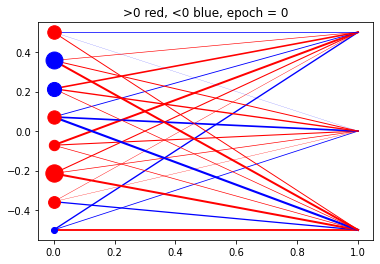

In [ ]:
def create_coord(np,x0):
    x = [x0] * np
    y = list(range(np))
    #y = y/(np - 1.) - .5
    for i in range(np):
            y[i] = y[i]/(np - 1.) - .5
    return(x,y)

(x1,y1) = create_coord(L,0)
(x2,y2) = create_coord(M,1)
             
def mycolor(val):
    if val>0:
        return "red"
    elif val<0:
        return "blue"
    return"black"

def plotgraph(w,a,b,epoch=0):
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]), (y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    # plot units
    for i in range(L):
        plt.scatter(x1[i],y1[i],s=A*np.abs(a[i]),zorder=2,c=mycolor(a[i]))
    A = 300./(a.max() + b.max())
    # plot units
    for j in range(M):
        plt.scatter(x2[j],y2[j],s=A*np.abs(b[j]),zorder=2,c=mycolor(b[j]))
    plt.title(f">0 red, <0 blue, epoch = {epoch}")
    plt.show()

plotgraph(w,a,b)

In [ ]:
def activate(v_in, wei, bias, DE, β = 1, info=False):
    act = np.dot(v_in,wei) + bias
    prob = 1. / (1. + np.exp(-DE * β * act))
    n = len(act)
    v_out = np.full(n,vmin)
    # Stochastic part
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input = ",v_in)
        print("act   = ",act)
        print("prob  = ",prob)
        print("out   = ",v_out)
    return (v_out)

activate(v[0],w,b,GAP,True)

array([0, 1, 0])

### Restricted Boltzmann Machine

In [ ]:
def RBM(w, v, a, b, M, nepoch = 50, mini = 500, l_rate = 1.0, plot = False):
    m = 0
    ws  = np.zeros_like(w)
    asa = np.zeros_like(a)
    bs  = np.zeros_like(b)
    ws[:]  = w[:]
    asa[:] = a[:]
    bs[:]  = b[:]
    for epoch in range(1,nepoch+1):
        for n in range(N):
            if m==0:
                # initialize the minibatch
                v_data, v_model   = np.zeros(L), np.zeros(L)
                h_data, h_model   = np.zeros(M), np.zeros(M)
                vh_data, vh_model = np.zeros((L,M)), np.zeros((L,M))

            # Positive CD phase
            h  = activate(v[n],ws,bs,GAP)
            # Negative CD phase
            vf = activate(h,ws.T,asa,GAP)
            # Positive CD phase nr 2
            hf = activate(vf,ws,bs,GAP)

            v_data  += v[n]
            v_model += vf
            h_data  += h                
            h_model += hf

            vh_data  += np.outer(v[n].T, h)
            vh_model += np.outer(vf.T, hf)

            m += 1

            if m==mini:
                C  = l_rate / mini
                dw = C*(vh_data - vh_model)
                da = C*(v_data - v_model)
                db = C*(h_data - h_model)
                # if epoch <=2 and n>=mini:
                #     print("--- epoch = ",epoch, "   n = ",n, "    m = ",m)
                #     print("dw = ",dw)
                #     print("da = ",da)
                #     print("db = ",db)

                ws += dw
                asa += da
                bs += db
                m = 0
        # randomize order
        np.random.shuffle(v)
        l_rate = l_rate /(0.05 * l_rate + 1) 
        if plot:
            if epoch %5 ==0:
                plotgraph(ws,asa,bs,epoch)
                print("l_rate = ",l_rate)
    return ws,asa,bs

In [ ]:
def comparison(x, x_true, pix):
    """
    Input:
        x -> Vector to compare
        x_true -> True vector
        pix -> pixel of confident
    Output:
        c/N -> rateo of pattern retrived by the algorithm
    """
    # x = np.asarray(x)
    # x_true = np.asarray(x_true)
    N = x.shape[0]
    K = x.shape[1]
    #print(N)
    #print(K)
    if (x.shape != x_true.shape):
        exit("Different shapes of the vectors to compare")
    c = 0
    for i in range(N):
        k = 0
        for j in range(K):
            if (x[i,j]==x_true[i,j]):
                k+=1
        if (k>= K-pix):
            c += 1
    
    return c/N

## Defining the costants of the system

In [ ]:
l_rate = 1.0 
# minibatches
mini, m = 500, 0
# epochs
nepoch = 50
score_both = []
score_1 = []
score_2 = []

## 1) Introduction of a lower temperature

Train the RBM.

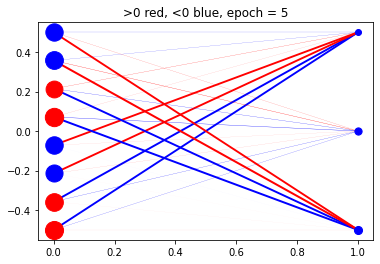

l_rate =  0.7999999999999998


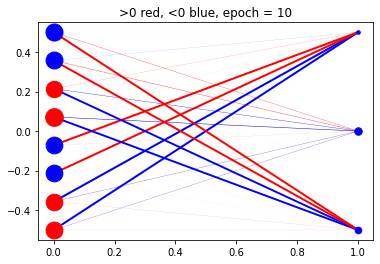

l_rate =  0.6666666666666663


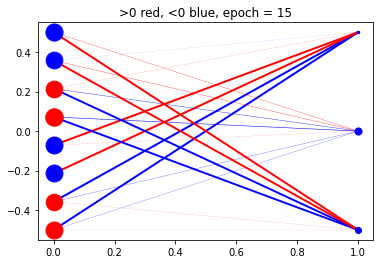

l_rate =  0.5714285714285713


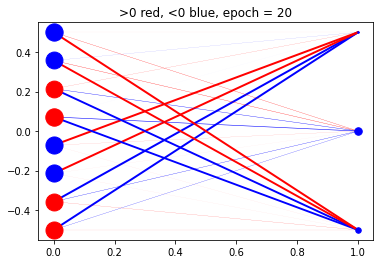

l_rate =  0.5


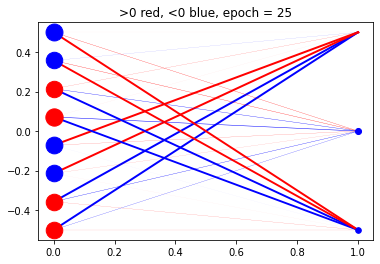

l_rate =  0.4444444444444445


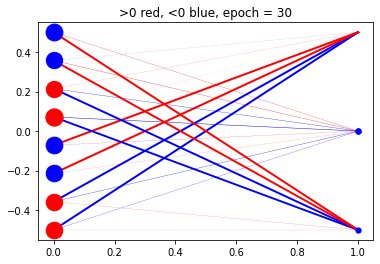

l_rate =  0.4000000000000001


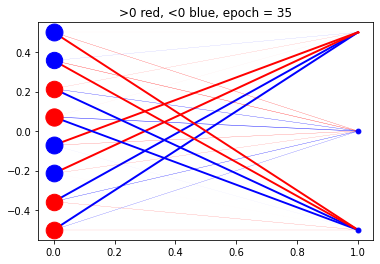

l_rate =  0.3636363636363637


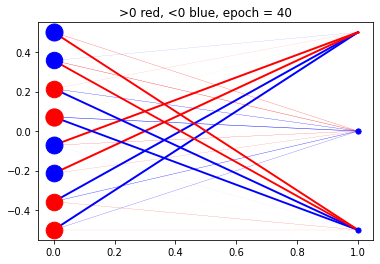

l_rate =  0.3333333333333335


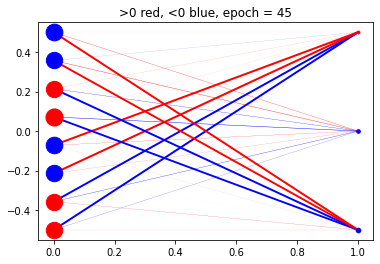

l_rate =  0.3076923076923079


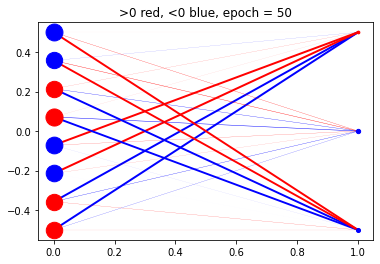

l_rate =  0.28571428571428586


In [ ]:
w1, a1, b1 = RBM(w, v, a, b, M, plot=True)

We have introduced some lower "temperature" in the sigmoid function for both the generation of the visible fantasy data and the positive phase generating the hidden units.

We have set $0$ pixels as confidence.

In [ ]:
pixi = 0

print("------------ β=1 ------------ ")
v1 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=1)
    v1[n] = activate(h,w1.T,a1,GAP,β=1)
    
for n in range(10):
    print((v0[n]).astype(int),(v1[n]).astype(int))

print(f"The score of the RBM with β = 1 and a confidence of {pixi} is {comparison(v1,v_true,pixi)} ")

print("------------ β=5 ------------ ")
v2 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=5)
    v2[n] = activate(h,w1.T,a1,GAP, β=5)
    
for n in range(10):
    print((v0[n]).astype(int),(v2[n]).astype(int))    

print(f"The score of the RBM with β = 5 and a confidence of {pixi} is {comparison(v2,v_true,pixi)} ")



print("----------- β=10 ----------- ")
v3 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=10)
    v3[n] = activate(h,w1.T,a1,GAP,β=10)
    
for n in range(10):
    print((v0[n]).astype(int),(v3[n]).astype(int))

print(f"The score of the RBM with β = 10 and a confidence of {pixi} is {comparison(v3,v_true,pixi)} ")

print("----------- β=15 ----------- ")
v4 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=15)
    v4[n] = activate(h,w1.T,a1,GAP,β=15)
    
for n in range(10):
    print((v0[n]).astype(int),(v4[n]).astype(int))

print(f"The score of the RBM with β = 15 and a confidence of {pixi} is {comparison(v4,v_true,pixi)} ")

------------ β=1 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1 0 0 1 1 0 0]
[0 1 1 1 0 0 1 1] [0 0 0 1 0 0 0 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0] [0 1 0 0 1 0 1 1]
[0 1 1 0 1 1 0 0] [1 0 0 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1] [1 0 0 0 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 1 1]
The score of the RBM with β = 1 and a confidence of 0 is 0.4036 
------------ β=5 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1 0 0 0 0 1 1]
[0 1 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0] [1 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1] [0 0 1 1 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 1 1]
The score of the RBM with β = 5 and a confidence of 0 is 0.9433 
----------- β=10 ----------- 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1

We have introduced some lower "temperature" in the sigmoid function just for the generation of the visible fantasy data.

In [ ]:
print("------------ β=1 ------------ ")
v1 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=1)
    v1[n] = activate(h,w1.T,a1,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v1[n]).astype(int))

print(f"The score of the RBM with β = 1 and a confidence of {pixi} is {comparison(v1,v_true,pixi)} ")

print("------------ β=5 ------------ ")
v2 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=5)
    v2[n] = activate(h,w1.T,a1,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v2[n]).astype(int))    

print(f"The score of the RBM with β = 5 and a confidence of {pixi} is {comparison(v2,v_true,pixi)} ")

print("----------- β=10 ----------- ")
v3 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=10)
    v3[n] = activate(h,w1.T,a1,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v3[n]).astype(int))

print(f"The score of the RBM with β = 10 and a confidence of {pixi} is {comparison(v3,v_true,pixi)} ")

print("----------- β=15 ----------- ")
v4 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP,β=15)
    v4[n] = activate(h,w1.T,a1,GAP)
    
for n in range(10):
    print((v0[n]).astype(int),(v4[n]).astype(int))

print(f"The score of the RBM with β = 15 and a confidence of {pixi} is {comparison(v4,v_true,pixi)} ")
    

------------ β=1 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 0 1]
[1 1 0 1 1 0 0 1] [0 1 0 0 1 1 0 1]
[0 1 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [1 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 0 0 1]
[1 1 0 0 1 0 0 0] [1 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1] [0 0 1 1 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 0 1]
The score of the RBM with β = 1 and a confidence of 0 is 0.4079 
------------ β=5 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 1 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1 1 0 0 1 1 1]
[0 1 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [1 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 0 0 1]
[1 1 0 0 1 0 0 0] [1 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 0 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1] [0 0 1 1 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 0 1]
The score of the RBM with β = 5 and a confidence of 0 is 0.4311 
----------- β=10 ----------- 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 1 1 1]
[1 1 0 1 1 0 0 1] [1 1

We have introduced some lower "temperature" in the sigmoid function just for the positive phase generating the hidden units.

In [ ]:
print("------------ β=1 ------------ ")
v1 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP)
    v1[n] = activate(h,w1.T,a1,GAP,β=1)
    
for n in range(10):
    print((v0[n]).astype(int),(v1[n]).astype(int))

print(f"The score of the RBM with β = 1 and a confidence of {pixi} is {comparison(v1,v_true,pixi)} ")
print("------------ β=5 ------------ ")
v2 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP)
    v2[n] = activate(h,w1.T,a1,GAP,β=5)
    
for n in range(10):
    print((v0[n]).astype(int),(v2[n]).astype(int))    

print(f"The score of the RBM with β = 5 and a confidence of {pixi} is {comparison(v2,v_true,pixi)} ")

print("----------- β=10 ----------- ")
v3 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP)
    v3[n] = activate(h,w1.T,a1,GAP,β=10)
    
for n in range(10):
    print((v0[n]).astype(int),(v3[n]).astype(int))

print(f"The score of the RBM with β = 10 and a confidence of {pixi} is {comparison(v3,v_true,pixi)} ")

print("----------- β=15 ----------- ")
v4 = np.full((N,L),vmin)
for n in range(N):
    h = activate(v0[n],w1,b1,GAP)
    v4[n] = activate(h,w1.T,a1,GAP,β=15)
    
for n in range(10):
    print((v0[n]).astype(int),(v4[n]).astype(int))

print(f"The score of the RBM with β = 15 and a confidence of {pixi} is {comparison(v4,v_true,pixi)} ")

------------ β=1 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 1 1 1]
[1 1 0 1 1 0 0 1] [1 1 0 1 0 0 1 1]
[0 1 1 1 0 0 1 1] [1 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 1 1 1]
[1 1 0 0 1 0 0 0] [1 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0] [1 1 0 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 1 0 0 0 0 0 1]
[1 0 0 1 1 1 0 1] [0 1 1 1 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 1 1]
The score of the RBM with β = 1 and a confidence of 0 is 0.4079 
------------ β=5 ------------ 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1 0 0 1 1 0 0]
[0 1 1 1 0 0 1 1] [0 0 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0] [0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0] [0 0 1 1 0 0 1 1]
[1 1 0 0 1 0 0 0] [1 1 0 0 1 1 0 0]
[0 1 1 0 1 1 0 0] [0 0 1 1 1 1 0 0]
[1 1 0 0 0 0 1 1] [1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1] [0 0 1 1 1 1 0 0]
[1 0 0 0 0 0 1 0] [1 1 0 0 0 0 1 1]
The score of the RBM with β = 5 and a confidence of 0 is 0.9307 
----------- β=10 ----------- 
[0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1]
[1 1 0 1 1 0 0 1] [1 1

## 2) Comparison with uncorrupted data

The cells above are just for the visualization of the reconstruction of the patterns. Now we are going to keep track of the scores of the $3$ different methods.

In [ ]:
pixi = 0
betas = np.linspace(1,16,50)

In [ ]:
score_both = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP, β = beta)
        v1[n] = activate(h, w1.T, a1, GAP, β = beta)
    score_both.append(comparison(v1, v_true, pixi))

In [ ]:
score_2 = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP)
        v1[n] = activate(h, w1.T, a1, GAP, β = beta)
    score_2.append(comparison(v1, v_true, pixi))

In [ ]:
score_1 = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP, β = beta)
        v1[n] = activate(h, w1.T, a1, GAP)
    score_1.append(comparison(v1, v_true, pixi))

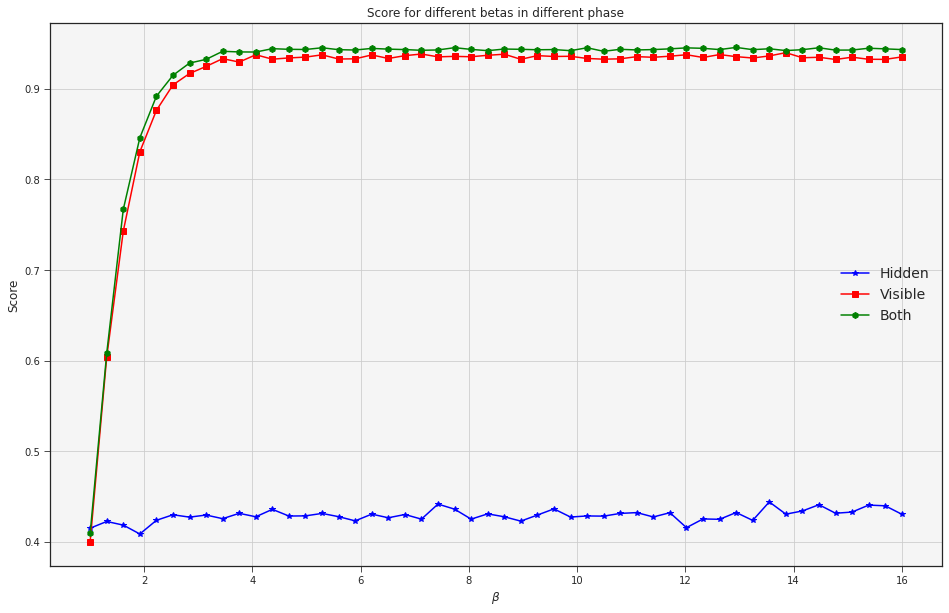

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("$\\beta$", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(betas,score_1,'b',label="Hidden",marker='*')
plt.plot(betas,score_2,'r',label="Visible",marker='s')
plt.plot(betas,score_both,'g',label="Both",marker='h')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

We can see that the best method is the one with both the lower temperature both for the hidden and the visible fantasy data, but the sore is not much different from the one obtained just with the visible data. 

With both the best $2$ methods, the score saturizes at around $\beta = 3$.

## 3) Introduction of a fifth state

In [ ]:
q = 0.1
fname = "DATA/dataRBM_q"+str(q)+"_4state.csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

# Data without corruption
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_4state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]

for n in range(10):
    print(v[n])

print("...")

np.random.seed(12345)

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...


In [ ]:
v, v_true = import_data(0.1, 4, False)

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...


We have to find out the minimum number of hidden units M for the RBM to work properly. We set $\beta = 1$ in this case and we do a loop for different values of $M$, keeping track of the score.

In [ ]:
M = np.arange(3,15)
score_m4 = []

for i in M:
    w = sigma * (2*np.random.rand(L,i) - 1) #matrix of weights
    a = sigma * (2*np.random.rand(L) - 1)
    b = np.zeros(i)

    w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
    w0[:],a0[:],b0[:] = w[:],a[:],b[:]

    w1,a1,b1 = RBM(w, v, a, b, M = i, plot = False)

    for n in range(N):
        h = activate(v0[n],w1,b1,GAP,β=1)
        v1[n] = activate(h,w1.T,a1,GAP,β=1)
    score_m4.append(comparison(v1, v_true, pixi))

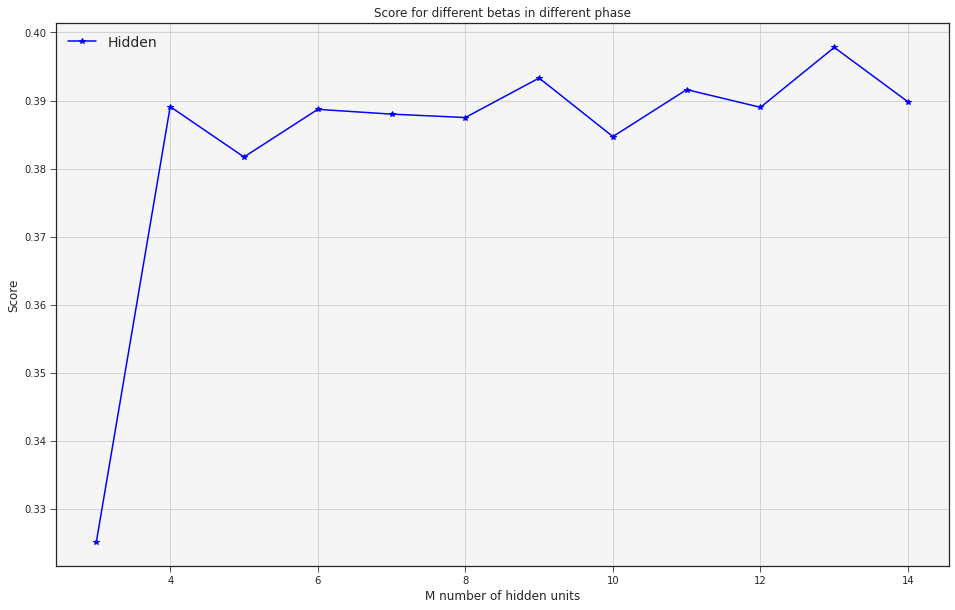

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("M number of hidden units", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(M,score_m4,'b',label="Hidden",marker='*')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

In [ ]:
q = 0.1
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

# Data without corruption
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]

for n in range(10):
    print(v[n])

print("...")

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...


In [ ]:
v, v_true = import_data(0.1, 5, False)

Here we have introduced another state, the sixth. The analysis is the same as before.

In [ ]:
score_m5 = []

for i in M:
    w = sigma * (2*np.random.rand(L,i) - 1) #matrix of weights
    a = sigma * (2*np.random.rand(L) - 1)
    b = np.zeros(i)
    #print(f"w = {w}\na = {a}\nb = {b}")
    w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
    w0[:],a0[:],b0[:] = w[:],a[:],b[:]

    w1,a1,b1 = RBM(w, v, a, b, M = i, plot = False)

    for n in range(N):
        h = activate(v0[n],w1,b1,GAP,β=1)
        v1[n] = activate(h,w1.T,a1,GAP,β=1)
    score_m5.append(comparison(v1, v_true, pixi))

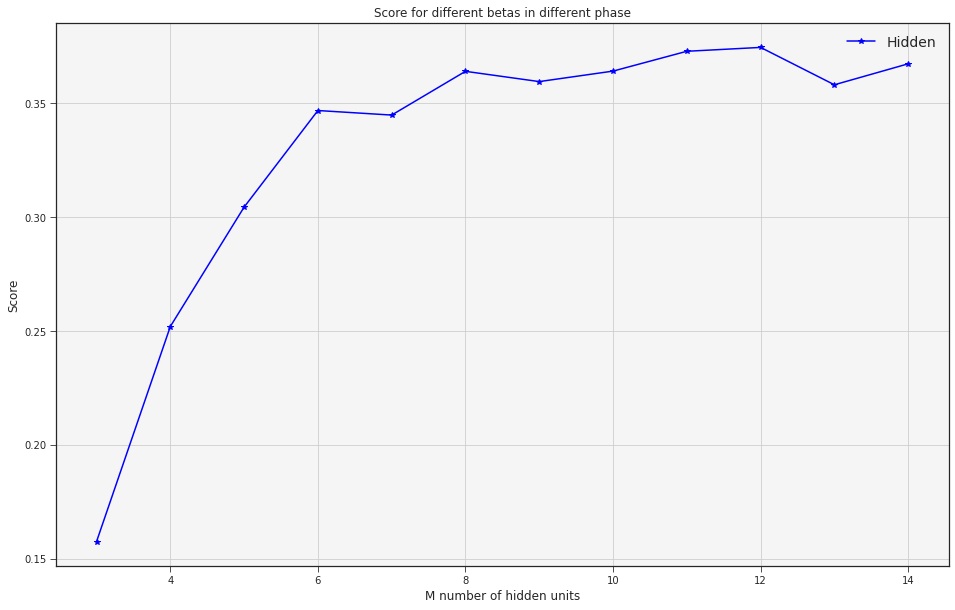

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("M number of hidden units", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(M,score_m5,'b',label="Hidden",marker='*')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

## 4) Above points with q=0.2

In [ ]:
q = 0.2
fname = "DATA/dataRBM_q"+str(q)+".csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

# Data without corruption
q = 0
fname = "DATA/dataRBM_q"+str(q)+".csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]

for n in range(10):
    print(v[n])

print("...")

np.random.seed(12345)

Each of N=10000 data samples has L=8 digits.
[0 1 1 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[1 1 1 0 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 1 0 1 0 0 0]
[1 1 1 0 1 1 0 0]
[1 1 0 0 0 1 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...


In [ ]:
v, v_true = import_data(0.2, 3, False)

In [ ]:
# Number of hidden units
M = 3

# This is good, is written in the review the denom is prop to the lenght of M
sigma = np.sqrt(4. /float(L + M))
np.random.seed(12345)

# Numbers in [-sigma;sigma]
w = sigma * (2*np.random.rand(L,M) - 1)
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print(f"w = {w}\na = {a}\nb = {b}")
w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
w0[:],a0[:],b0[:] = w[:],a[:],b[:]

w = [[ 0.5181365  -0.22145941 -0.38120826]
 [-0.35631371  0.08167946  0.11523125]
 [ 0.56022559  0.18473853  0.3001927 ]
 [ 0.18521223  0.2987553   0.55635686]
 [-0.59290602 -0.47464594 -0.24277246]
 [ 0.18863898  0.373648    0.44886104]
 [ 0.56038609  0.26977468  0.17183171]
 [ 0.26225893 -0.03907707 -0.21035279]]
a = [-0.07279134  0.27701546  0.59580401  0.21331772  0.35074515 -0.39689234
 -0.57064124  0.36226014]
b = [0. 0. 0.]


In [ ]:
score_both = []
score_1 = []
score_2 = []

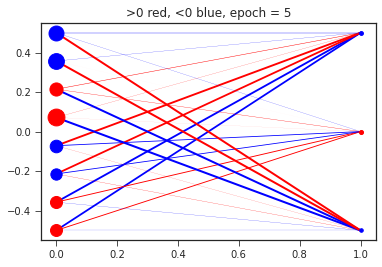

l_rate =  0.7999999999999998


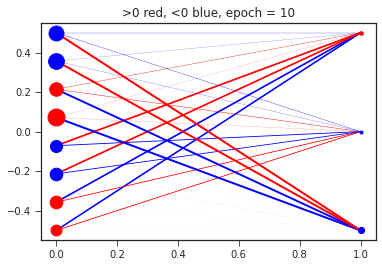

l_rate =  0.6666666666666663


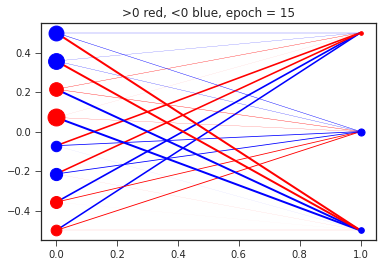

l_rate =  0.5714285714285713


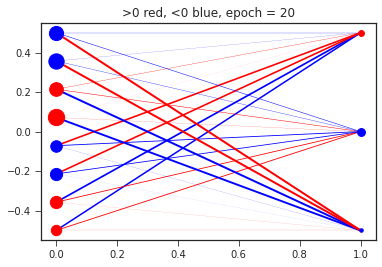

l_rate =  0.5


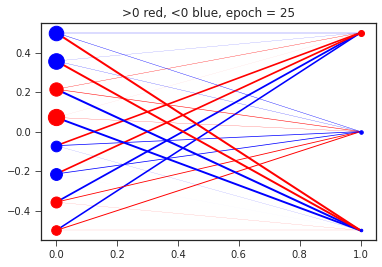

l_rate =  0.4444444444444445


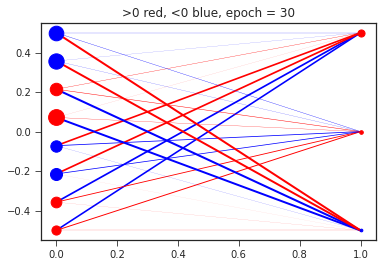

l_rate =  0.4000000000000001


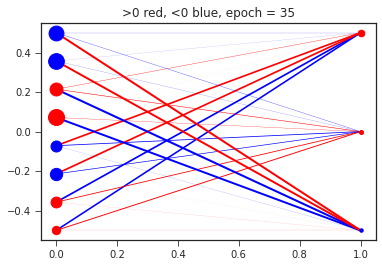

l_rate =  0.3636363636363637


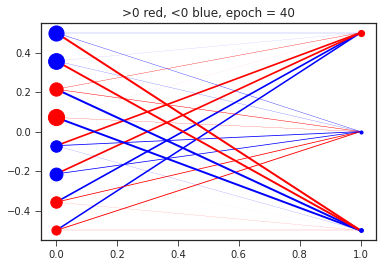

l_rate =  0.3333333333333335


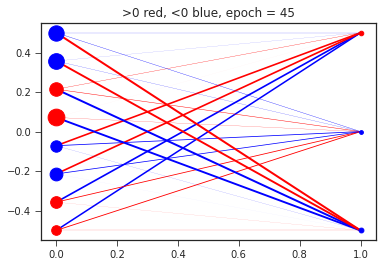

l_rate =  0.3076923076923079


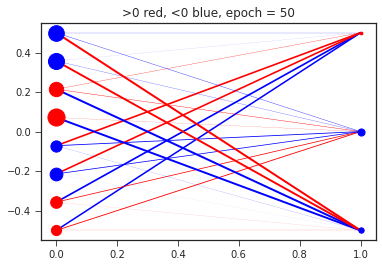

l_rate =  0.28571428571428586


In [ ]:
w1, a1, b1 = RBM(w, v, a, b, M, plot=True)

In [ ]:
score_both = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP, β = beta)
        v1[n] = activate(h, w1.T, a1, GAP, β = beta)
    score_both.append(comparison(v1, v_true, pixi))

In [ ]:
score_2 = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP)
        v1[n] = activate(h, w1.T, a1, GAP, β = beta)
    score_2.append(comparison(v1, v_true, pixi))

In [ ]:
score_1 = []
for beta in betas:
    v1 = np.full((N,L),vmin)
    for n in range(N):
        h = activate(v0[n], w1, b1, GAP)
        v1[n] = activate(h, w1.T, a1, GAP, β = beta)
    score_1.append(comparison(v1, v_true, pixi))

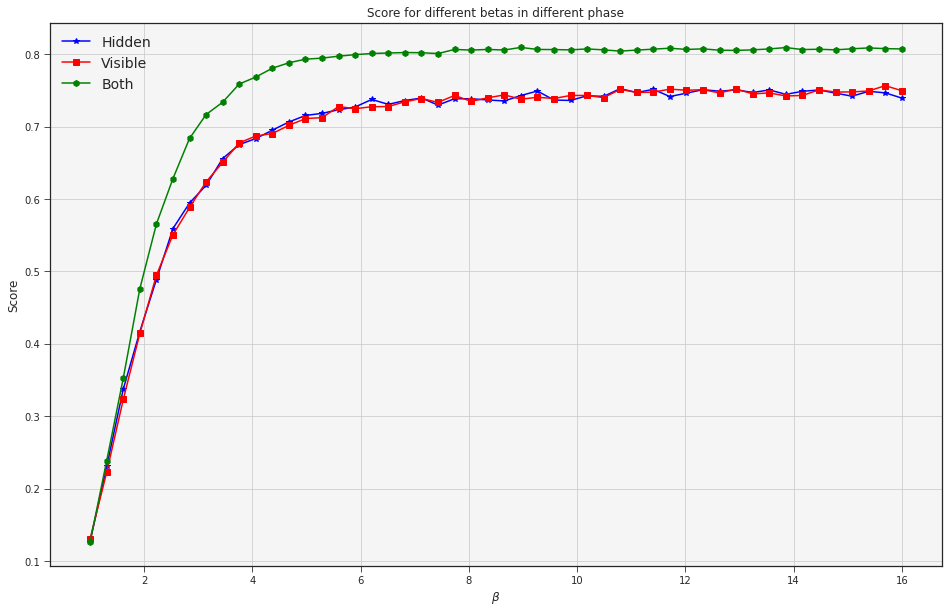

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("$\\beta$", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(betas,score_1,'b',label="Hidden",marker='*')
plt.plot(betas,score_2,'r',label="Visible",marker='s')
plt.plot(betas,score_both,'g',label="Both",marker='h')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

In [ ]:
q = 0.2
fname = "DATA/dataRBM_q"+str(q)+"_4state.csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

# Data without corruption
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_4state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]

for n in range(10):
    print(v[n])

print("...")

np.random.seed(12345)

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[0 1 0 0 0 1 1 0]
[0 1 1 1 1 0 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 0 1]
[0 1 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 1 0]
[0 0 0 1 1 0 1 1]
...


In [ ]:
v, v_true = import_data(0.2, 4, False)

In [ ]:
M = np.arange(3,15)
score_m4 = []

for i in M:
    w = sigma * (2*np.random.rand(L,i) - 1) #matrix of weights
    a = sigma * (2*np.random.rand(L) - 1)
    b = np.zeros(i)

    w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
    w0[:],a0[:],b0[:] = w[:],a[:],b[:]

    w1,a1,b1 = RBM(w, v, a, b, M = i, plot = False)

    for n in range(N):
        h = activate(v0[n],w1,b1,GAP,β=1)
        v1[n] = activate(h,w1.T,a1,GAP,β=1)
    score_m4.append(comparison(v1, v_true, pixi))

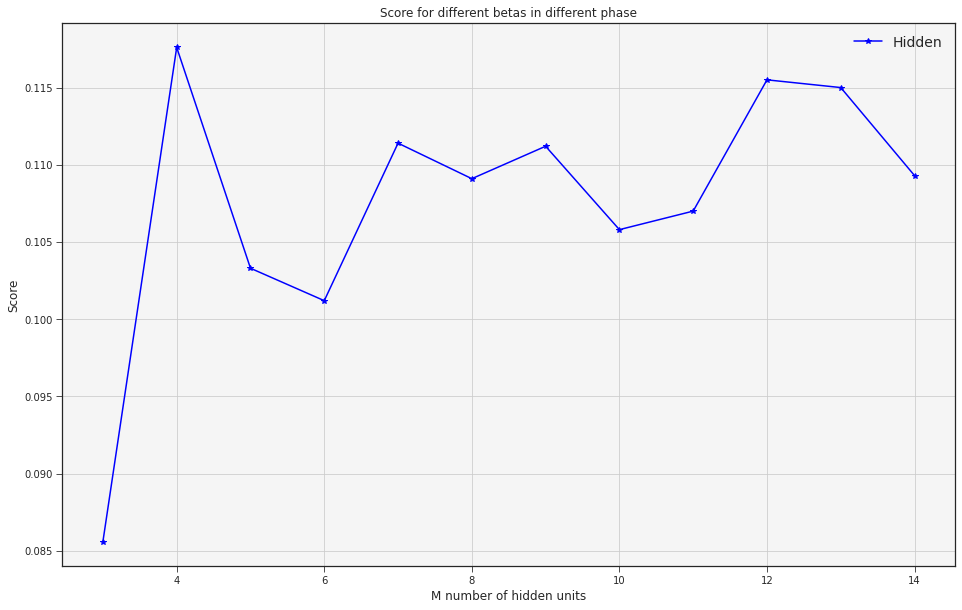

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("M number of hidden units", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(M,score_m4,'b',label="Hidden",marker='*')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

In [ ]:
q = 0.1
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v = np.loadtxt(fname,delimiter=",",dtype=int)
N = len(v)
# Length of sample
L = len(v[0])
print(f"Each of N={N} data samples has L={L} digits.")

# Data without corruption
q = 0
fname = "DATA/dataRBM_q"+str(q)+"_5state.csv"
# Visible data
v_true = np.loadtxt(fname,delimiter=",",dtype=int)

# Store initial values
v0 = np.zeros_like(v)
v0[:] = v[:]

for n in range(10):
    print(v[n])

print("...")

Each of N=10000 data samples has L=8 digits.
[1 1 0 0 1 1 0 0]
[1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 0 0]
[0 0 1 1 0 0 1 1]
[1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 1]
[0 0 1 1 1 0 1 1]
[0 0 1 1 1 1 0 0]
[1 1 0 0 1 1 0 0]
[0 0 0 1 1 0 1 1]
...


In [ ]:
v, v_true = import_data(0.2, 5, False)

In [ ]:
score_m5 = []

for i in M:
    w = sigma * (2*np.random.rand(L,i) - 1) #matrix of weights
    a = sigma * (2*np.random.rand(L) - 1)
    b = np.zeros(i)
    #print(f"w = {w}\na = {a}\nb = {b}")
    w0,a0,b0 = np.zeros_like(w),np.zeros_like(a),np.zeros_like(b)
    w0[:],a0[:],b0[:] = w[:],a[:],b[:]

    w1,a1,b1 = RBM(w, v, a, b, M = i, plot = False)

    for n in range(N):
        h = activate(v0[n],w1,b1,GAP,β=1)
        v1[n] = activate(h,w1.T,a1,GAP,β=1)
    score_m5.append(comparison(v1, v_true, pixi))

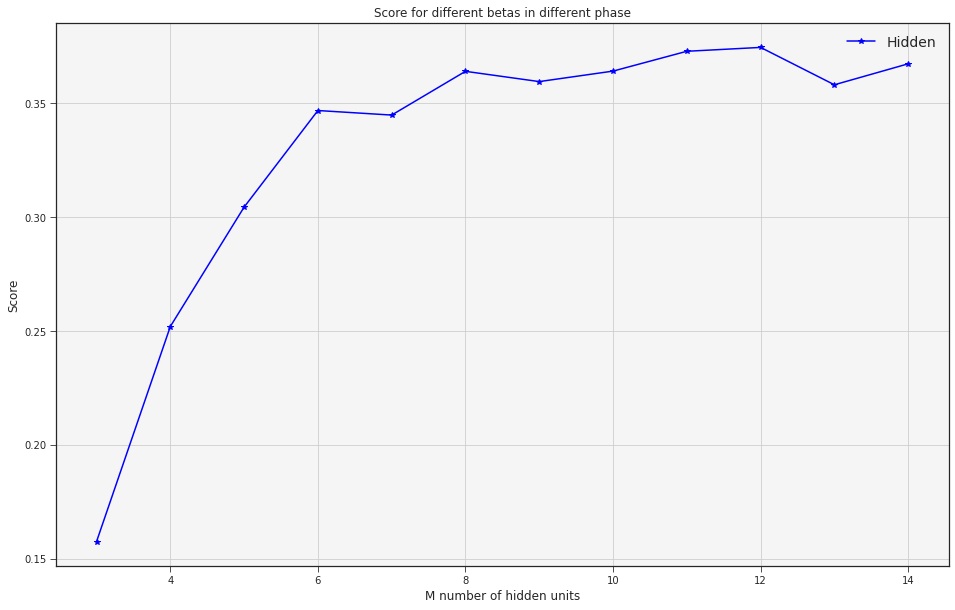

In [ ]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(16,10))
ax = plt.axes()
ax.set_facecolor("whitesmoke")
plt.title("Score for different betas in different phase")


plt.xlabel("M number of hidden units", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.plot(M,score_m5,'b',label="Hidden",marker='*')
plt.grid()
plt.legend(fontsize=14,loc="best")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc341315-a668-4e89-92e9-cab634ea884a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>